In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))  

User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip

Archive:  wine-quality.zip
replace winequalityN.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: winequalityN.csv        

Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

2 archives were successfully processed.


**Part-1**

**Univariate Selection**

In [ ]:
# sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

**SelectKBest removes all but the  highest scoring features**

In [ ]:
#******************************************
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
print(X.shape)
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(X_new.shape)

(150, 4)
(150, 2)


In [ ]:
#*********************************************
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
print(X.shape)
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
print(X_new.shape)

(1797, 64)
(1797, 20)


In [ ]:
#**********************************************
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
data=pd.read_csv('diabetes.csv')
data.head(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
Y= data["Outcome"]
X = data.drop(["Outcome"], axis = 1)

In [ ]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


**Regression Feature Selection:(Numerical Input, Numerical Output)**

In [ ]:
#This section demonstrates feature selection for a regression problem that as numerical inputs and numerical outputs.
#A test regression problem is prepared using the make_regression() function.
#Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.

In [ ]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


**Classification Feature Selection:(Numerical Input, Categorical Output)**

In [ ]:
#This section demonstrates feature selection for a classification problem that as numerical inputs and categorical outputs.
#A test regression problem is prepared using the make_classification() function.
#Feature selection is performed using ANOVA F measure via the f_classif() function.

In [ ]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 2)


**SelectPercentile removes all but a user-specified highest scoring percentage of features**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
print(X.shape)
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
print(X_new.shape)

(1797, 64)
(1797, 7)


**SelectFpr: Select features based on a false positive rate test.
Select the pvalues below alpha based on a FPR test.
It controls the total amount of false detections.**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFpr, chi2
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
X_new = SelectFpr(chi2, alpha=0.01).fit_transform(X, y)
print(X_new.shape)

(569, 30)
(569, 16)


**SelectFdr: Select features based on an estimated false discovery rate.Select the p-values for an estimated false discovery rate**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFdr, chi2
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
X_new = SelectFdr(chi2, alpha=0.01).fit_transform(X, y)
print(X_new.shape)

(569, 30)
(569, 16)


**SelectFwe: Select features based on family-wise error rate.Select the p-values corresponding to Family-wise error rate**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFwe, chi2
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
X_new = SelectFwe(chi2, alpha=0.01).fit_transform(X, y)
print(X_new.shape)

(569, 30)
(569, 15)


In [ ]:
f_classif: ANOVA F-value between label/feature for classification tasks.
mutual_info_classif: Mutual information for a discrete target.
chi2: Chi-squared stats of non-negative features for classification tasks.
f_regression: F-value between label/feature for regression tasks.
mutual_info_regression: Mutual information for a continuous target.
SelectPercentile: Select features based on percentile of the highest scores.
SelectFpr: Select features based on a false positive rate test.
SelectFdr: Select features based on an estimated false discovery rate.
SelectFwe: Select features based on family-wise error rate.
GenericUnivariateSelect: Univariate feature selector with configurable mode.

**Feature selection using Python for classification problems**

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
print(X[: 5, :])
print(X.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 4)


In [ ]:
#The data have four features. To test the effectiveness of different feature selection methods, we add some noise features to the data set.
np.random.seed(100)
E = np.random.uniform(0, 1, size=(len(X), 10))
X = np.hstack((X, E))
print(X.shape)

(150, 14)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(105, 14)


**Removing features with low variance**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(X_train)
print(X_train_remove_variance.shape)

(105, 14)


**Univariate feature selection**

use chi-square test

In [ ]:
sel_chi2 = SelectKBest(chi2, k=4)    # select 4 features
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)
print(sel_chi2.get_support())
#The first four elements in the array are true, which means the first four features were selected by this method. Since these features are the original features in the data, the chi-square test performs well.

[ True  True  True  True False False False False False False False False
 False False]


use f test

In [ ]:
sel_f = SelectKBest(f_classif, k=4)
X_train_f = sel_f.fit_transform(X_train, y_train)
print(sel_f.get_support())

[ True  True  True  True False False False False False False False False
 False False]


use mutual_info_classif test

In [ ]:
from sklearn.feature_selection import mutual_info_classif
sel_mutual = SelectKBest(mutual_info_classif, k=4)
X_train_mutual = sel_mutual.fit_transform(X_train, y_train)
print(sel_mutual.get_support())
#For regression problems, similarly, we can use f_regression, mutual_info_regression to conduct the feature selection.

[ True  True  True  True False False False False False False False False
 False False]


**Recursive feature elimination**

use the logistic regression as the model

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=4, step=1)
X_train_rfe_logistic = sel_rfe_logistic.fit_transform(X_train, y_train)
print(sel_rfe_logistic.get_support())
print(sel_rfe_logistic.ranking_)
#The features which were selected are rank 1. The result shows that the recursive feature elimination selects only part of the original features and one noise feature. This is not an ideal result we want

[False  True  True  True False False False False False False False False
 False  True]
[ 3  1  1  1  9  8  7  6  5  4  2 11 10  1]


use the random forest as the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=4, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
print(sel_rfe_tree.get_support())

[ True  True  True  True False False False False False False False False
 False False]


**Feature selection using SelectFromModel**

L1-based feature selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000, penalty='l1')
sel_model_logistic = SelectFromModel(estimator=model_logistic)
X_train_sfm_l1 = sel_model_logistic.fit_transform(X_train, y_train)
print(sel_model_logistic.get_support())
#It selects the wrong features! The second feature in the original dataset was ignored while one feature from the noise was selected.

[ True False  True  True False False False False False  True False False
 False False]


Tree-based feature selection

In [ ]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())
#It selects the correct original features.
#In summary of all the above features selection methods: for this particular data set, using the logistic model as recursive feature elimination or model selection select the features incorrectly. On the other hand, all other feature selection methods select the first four features correctly.

[0.118 0.094 0.213 0.337 0.02  0.031 0.023 0.02  0.024 0.022 0.033 0.018
 0.018 0.028]
[ True  True  True  True False False False False False False False False
 False False]


**Let’s compare the performance before and after the feature selection**

Before feature selection

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)
model_logistic.fit(X_train, y_train)
predict = model_logistic.predict(X_test)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[16  0  0]
 [ 0 11  0]
 [ 0  2 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



After feature selection

In [ ]:
#we use the result from the feature selection based on the chi-square test.
X_train_chi2 is the data after the feature selection to feed into the model.
model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)
model_logistic.fit(X_train_chi2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#We also need to transform the test data because the number of features was changed.
X_test_chi2 = sel_chi2.transform(X_test)
print(X_test.shape)
print(X_test_chi2.shape)

(45, 14)
(45, 4)


In [ ]:
#Only use the features in the test set that are corresponding to the remaining features in the training set. Four features in this case.
predict = model_logistic.predict(X_test_chi2)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
#In sum, feature selection removes the noise and generalize the model better, thus improve the model performance.

[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**How to Perform Feature Selection with Categorical Data**

In [ ]:
Breast Cancer Categorical Dataset
Categorical Feature Selection
Chi-Squared Feature Selection
Mutual Information Feature Selection
Modeling With Selected Features
Model Built Using All Features
Model Built Using Chi-Squared Features
Model Built Using Mutual Information Features

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


**Chi-Squared Feature Selection**

In [ ]:
#Categorical Feature Selection
#There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable.
1.Chi-Squared Statistic.
2.Mutual Information Statistic

In [ ]:
#Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables
#The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.
#When there are three or more levels for the predictor, the degree of association between predictor and outcome can be measured with statistics such as X2 (chi-squared) tests 
#The scikit-learn machine library provides an implementation of the chi-squared test in the chi2() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


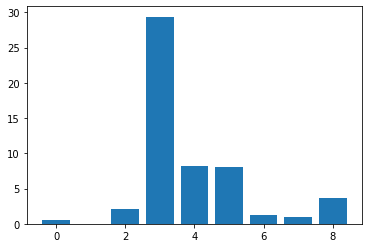

In [ ]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
#we can see the scores are small and it is hard to get an idea from the number alone as to which features are more relevant.
#Perhaps features 3, 4, 5, and 8 are most relevant.
#A bar chart of the feature importance scores for each input feature is created.
#This clearly shows that feature 3 might be the most relevant (according to chi-squared) and that perhaps four of the nine input features are the most relevant.
#We could set k=4 When configuring the SelectKBest to select these top four features

**Mutual Information Feature Selection**

In [ ]:
#Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.
#Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.
#The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the mutual_info_classif() function.
#Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).

Feature 0: 0.028563
Feature 1: 0.000000
Feature 2: 0.094494
Feature 3: 0.007871
Feature 4: 0.083671
Feature 5: 0.035354
Feature 6: 0.022691
Feature 7: 0.000000
Feature 8: 0.002495


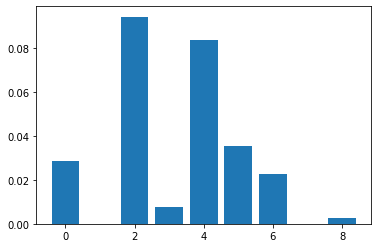

In [ ]:
# example of mutual information feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

**Model Built Using All Features**

In [ ]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


**Model Built Using Chi-Squared Features**

In [ ]:
# evaluation of a model fit using chi squared input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


**Model Built Using Mutual Information Features**

In [ ]:
# evaluation of a model fit using mutual information input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 73.68


***RFE-Recursive Feature elimination***

In [ ]:
# Feature Extraction with RFE
import warnings
warnings.filterwarnings("ignore")
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


**Principal Component Analysis**

In [ ]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.88854663 0.06159078 0.02579012]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]


**Feature Importance**

In [ ]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.11334628 0.21744782 0.10204928 0.08168902 0.08105104 0.13750828
 0.1167444  0.15016388]


**RFE CV (Recursive Feature Elimination CV)**

In [ ]:
#Recursive feature elimination with built-in cross-validated selection of the best number of features.
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]


**SelectFromModel:Feature selection based on thresholds of importance weights.**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
X = [[ 0.87, -1.34,  0.31 ],
...      [-2.79, -0.02, -0.85 ],
...      [-1.34, -0.48, -2.55 ],
...      [ 1.92,  1.48,  0.65 ]]
y = [0, 1, 0, 1]
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
selector.estimator_.coef_
selector.threshold_
selector.get_support()
selector.transform(X)

**SequentialFeatureSelector:Sequential cross-validation based feature selection. Does not rely on importance weights.**

**Wrapper methods**

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)         # for dataset dimension
print(boston.feature_names)      # for feature names
print(boston.target)             # for target variable
print(boston.DESCR)              # for data description

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

In [ ]:
import pandas as pd
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Forward selection**

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
#This above function accepts data, target variable, and significance level as arguments and returns the final list of significant features based on p-values through forward selection

In [ ]:
forward_selection(X,y)

**Implementing Forward selection using built-in functions in Python**

In [ ]:
#mlxtend library contains built-in implementation for most of the wrapper methods based feature selection techniques. SequentialFeatureSelector() function comes with various combinations of feature selection techniques
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
SequentialFeatureSelector() function accepts the following major arguments :

LinearRegression() is an estimator for the entire process. Similarly, it can be any classification based algorithm.

k_features indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.

forward and floating arguments for different flavors of wrapper methods, here, forward = True and floating = False are for forward selection technique.

The scoring argument specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be accuracy, precision, recall, f1-score, etc.

cv argument is for k-fold cross-validation.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_     # to get the final set of features

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

**Backward elimination**

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features
#This above function returns the final list of significant features based on p-values through backward elimination.

**Implementing Backward elimination using built-in functions in Python**

In [ ]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)
sbs.k_feature_names_

In [ ]:
#Here we are directly using the optimal value of k_features argument in both forward selection and backward elimination. In order to find out the optimal number of significant features, we can use the hit and trial method for different values of k_features and make the final decision by plotting it against the model performance.

In [ ]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=(3, 11),
                          n_jobs=1, pre_dispatch='2*n_jobs', scoring=None,
                          verbose=0)

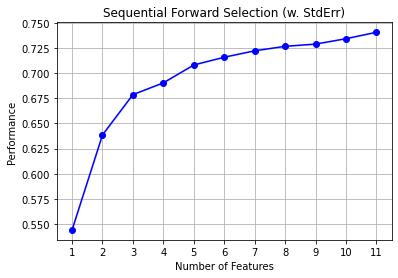

In [ ]:
#The same visualization can be achieved through plot_sequential_feature_selection()function available in mlxtend.plotting module.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
#Here, on the y-axis, the performance label indicates the R-squared values for the different numbers of features

**Bi-directional elimination(Step-wise Selection)**

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features
#This above function returns the final list of significant features based on p-values through bi-directional elimination.

In [ ]:
stepwise_selection(X,y)

**Implementing bi-directional elimination using built-in functions in Python**

In [ ]:
#The same SequentialFeatureSelector()function can be used to perform backward elimination by enabling forward and floating arguments.
# Sequential Forward Floating Selection(sffs)
sffs = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_